In [1]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [2]:
N = 1000

#defining the initial conditions
I0 = 1     
R0 = 0
S0 = N - I0 - R0

rateOfInfection = 0.275
rateOfRecovery = 1/50

t = np.linspace(0,250,250) # this gives us a timeline of 0 to 200 days with each day being a sample we will plot 


In [3]:
#defining the SIR model differential equations

def sirDifferentialEq(sirValues, t, N, b, g):
    S, I, R = sirValues
    
    dSdt = -b*((S*I)/N)
    dIdt =  b*((S*I)/N) - g*I
    dRdt =  g*I

    return dSdt , dIdt , dRdt


In [4]:
#initializing the sir values vector with initial conditions
v0 = S0, I0, R0

In [5]:
#now using the ode solver to calculate the values of the compartments acc to the timeline we have decided

result = odeint(sirDifferentialEq, v0, t, args=(N, rateOfInfection, rateOfRecovery))

print(result) # the odeint returns an array of values of variables at time = t points defined in the timeline

S, I, R = result.T

[[9.99000000e+02 1.00000000e+00 0.00000000e+00]
 [9.98685745e+02 1.29137359e+00 2.28813838e-02]
 [9.98280091e+02 1.66748092e+00 5.24283392e-02]
 [9.97756568e+02 2.15285337e+00 9.05782986e-02]
 [9.97081120e+02 2.77905094e+00 1.39828929e-01]
 [9.96209974e+02 3.58662802e+00 2.03398278e-01]
 [9.95086956e+02 4.62761520e+00 2.85429299e-01]
 [9.93640117e+02 5.96863301e+00 3.91250426e-01]
 [9.91777533e+02 7.69476089e+00 5.27706006e-01]
 [9.89382142e+02 9.91428516e+00 7.03573072e-01]
 [9.86305492e+02 1.27644253e+01 9.30083138e-01]
 [9.82360356e+02 1.64180745e+01 1.22156920e+00]
 [9.77312285e+02 2.10914575e+01 1.59625759e+00]
 [9.70870411e+02 2.70523684e+01 2.07722033e+00]
 [9.62678259e+02 3.46282483e+01 2.69349291e+00]
 [9.52305922e+02 4.42127365e+01 3.48134193e+00]
 [9.39245934e+02 5.62684351e+01 4.48563097e+00]
 [9.22916354e+02 7.13224694e+01 5.76117636e+00]
 [9.02675933e+02 8.99501640e+01 7.37390336e+00]
 [8.77857288e+02 1.12741203e+02 9.40150854e+00]
 [8.47823949e+02 1.40242831e+02 1.193321

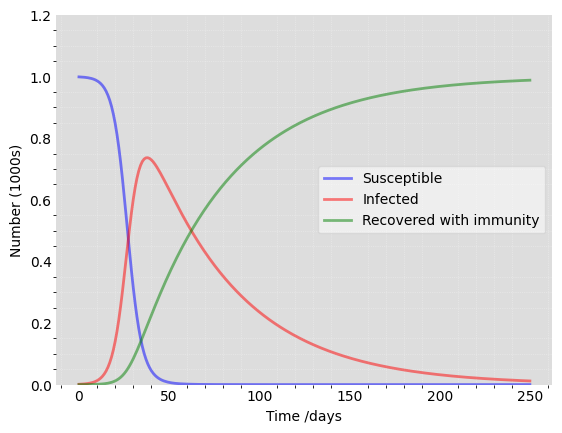

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')

ax.set_xlabel('Time /days')

ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)

#ax.grid(which='major', color='#DDDDDD', linewidth= 0.5)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
